# Task1 - Data Science and Business Analytics

### Submitted by : Chanukya Sai Mendu


# Prediction using Supervised ML 

importing all required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_absolute_error

Retrieving the given Data

In [2]:
df=pd.read_csv("http://bit.ly/w-data")

The first 5 rows of data

In [3]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking for NULL values in data

In [4]:
df.isna().any()

Hours     False
Scores    False
dtype: bool

#### Visualizing the data

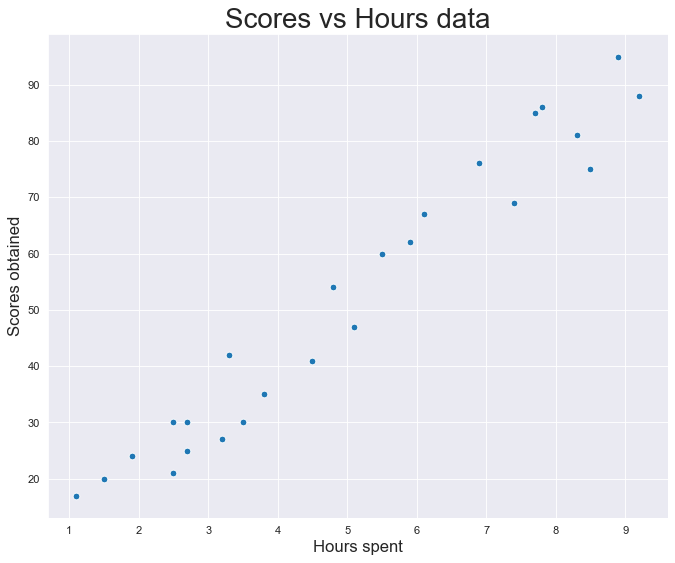

In [5]:
plt.figure(figsize=(10,8),dpi=80)
sns.set_style('darkgrid')

sns.scatterplot(y=df.Scores,x=df.Hours)

plt.xlabel('Hours spent',size=15)
plt.ylabel('Scores obtained',size=15)
plt.title('Scores vs Hours data',size=25)
plt.show()

##### Linear Regression Model

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [7]:
type(y),type(x)

(numpy.ndarray, numpy.ndarray)

#### Model assignment

In [8]:
linr_model=LinearRegression()

#### Train test Split

In [9]:
x_tr,x_te,y_tr,y_te=tts(x,y,test_size=0.2,random_state=42)

#### Training the model with train datasets

In [10]:
linr_model.fit(x_tr,y_tr)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### The model is trained.  
### Let's visualize the regressor before predicting, with the help of seaborn

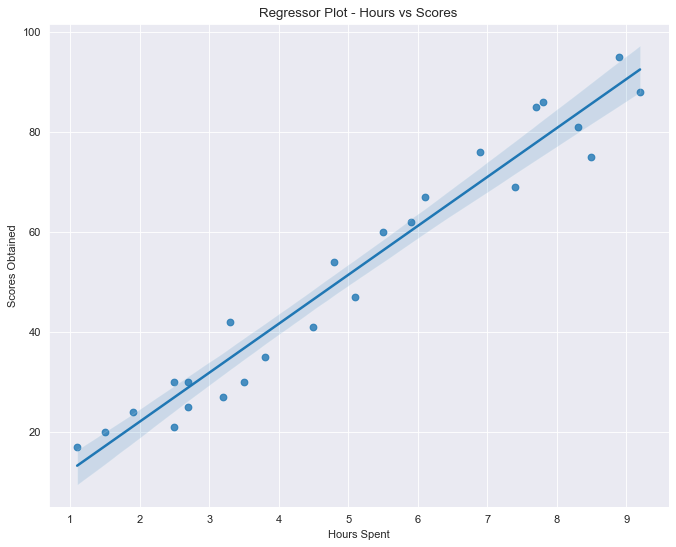

In [11]:
plt.figure(figsize=(10,8),dpi=80)
sns.regplot(x=df['Hours'],y=df['Scores'])
plt.xlabel('Hours Spent')
plt.ylabel("Scores Obtained")
plt.title("Regressor Plot - Hours vs Scores")
plt.show()

### Prediction of scores

In [12]:
y_pre=linr_model.predict(x_te)

Understanding the attributes of y_te,y_pre

In [13]:
print("Type :",type(y_te),type(y_pre))
print("Shape: ",y_te.shape,y_pre.shape)
print("Dimensions: ",y_te.ndim,y_pre.ndim)

Type : <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Shape:  (5, 1) (5, 1)
Dimensions:  2 2


In [14]:
df2=pd.DataFrame.from_records({" Hours ":x_te.reshape(len(x_te)),"Actual Score":y_te.reshape(len(y_te))})
df2

,Hours,Actual Score
0,8.3,81
1,2.5,30
2,2.5,21
3,6.9,76
4,5.9,62


In [15]:
df3=pd.DataFrame.from_records({"Hours":x_te.reshape(len(x_te)),"Predicted Score":y_pre.reshape(len(y_pre))})
df3

,Hours,Predicted Score
0,8.3,83.188141
1,2.5,27.032088
2,2.5,27.032088
3,6.9,69.633232
4,5.9,59.951153


In [16]:
df4=pd.DataFrame.from_records({"actual score":y_te.reshape(len(y_te)),"predicted score": y_pre.reshape(len(y_pre))},index=list(range(len(y_te))))
df4

,actual score,predicted score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [17]:
hours=9.25
score=linr_model.predict([[hours]]).item(0)
print("The predicted score for 9.25 Hours is :\n",'\033[92m','\033[1m',score,'\033[0m')

The predicted score for 9.25 Hours is :
   92.38611528261494 


In [18]:
print("Mean Absolute Error: ",'\033[91m','\033[1m',mean_absolute_error(y_te,y_pre),'\033[0m')

Mean Absolute Error:    3.9207511902099244 
